# K-Nearest Neighbors Classification

This is a user-friendly Jupyter Notebook version of KNN classifier. It allows users to:

- Upload a dataset
- Choose parameters for K-Nearest Neighbors (KNN)
- Select cross validation methods
- View classification results (accuracy, sensitivity, specificity)
- Visualize the confusion matrix for both training ans validation sets
- Visualizw score report for each sample    


## Import Libraries

In [1]:
import knn_utils as knn
import pandas as pd  # For data manipulation and analysis
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML
import io  

In [2]:
# K (number of neighbors)
k_widget = widgets.BoundedIntText(min=1, max=20, description='Number of nearest neighbors (K):', style={'description_width': 'initial'})

# Distance metric selection (Dropdown)
metric_widget = widgets.Dropdown(
    options=['euclidean', 'manhattan', 'chebyshev'], description='Distance Metric:', style={'description_width': 'initial'})

# Weight function selection (Dropdown)
weights_widget = widgets.Dropdown(
    options=['one', 'inverse', 'inversesquare'], description='Weight Function:', style={'description_width': 'initial'})

# Dropdown to select cross-validation method
cv_widget = widgets.Dropdown(
    options=['Leave-One-Out', 'K-Fold'], description='Cross Validation Method:',style={'description_width': 'initial'})

# Numeric input for number of folds (only relevant for K-Fold)
fold_widget = widgets.BoundedIntText(
    value=5, min=2, max=20, description='Number of folds:',style={'description_width': 'initial'})

# Output area for dynamically showing/hiding fold input
cv_output = widgets.Output()

# Function to dynamically show fold input only if 'K-Fold' is selected
def update_cv_ui(change):
    with cv_output:
        cv_output.clear_output()  # Clear previous output
        if cv_widget.value == 'K-Fold':
            display(fold_widget)  # Show fold input only if 'K-Fold' is selected
cv_widget.observe(update_cv_ui, names='value') # update_cv_ui() is run when cv_widget value changes

display(k_widget,
        metric_widget,
        weights_widget
)
# Display the CV dropdown menu
display(cv_widget)
display(cv_output)
update_cv_ui(None)

# Input file widget
uploader = widgets.FileUpload(accept='.csv', multiple=False, description="Upload File")
display(HTML("<b>Import CSV File</b>"))
display(uploader)

def on_run_clicked(b):
    with output:  # All printed output will appear inside the 'output' widget
        global file_name, X, y
        output.clear_output()  # Clear previous output
        if not uploader.value:
            print("⚠️ No file uploaded. Please choose the input file and re-run the code above.") 
            return

        # Read hyperparameters and CV settings from widgets
        k = k_widget.value                          # Number of neighbors
        metric = metric_widget.value                # Distance metric
        weights = weights_widget.value              # Weighting method
        cv_method = cv_widget.value                 # Cross-validation method
        n = 1 if cv_method == 'Leave-One-Out' else fold_widget.value  # LOOCV if 1 split, K-fold if otherwise

        value = uploader.value 
            
        if isinstance(value, dict):
            uploaded_file = list(value.values())[0]
        elif isinstance(value, (list, tuple)):                
            uploaded_file = value[0]
        else:
            print("❌ Unsupported uploader value format.")
                  
        content = uploaded_file['content']                # Binary content of the file
        file_name = uploaded_file['name']        
         
        data = pd.read_csv(io.BytesIO(content))     # Read into a DataFrame from memory buffer
        X = data.drop(columns=['NAME', 'CLASS'])    # Use all columns except 'NAME' and 'CLASS' as features
        y = data['CLASS']                           # Use 'CLASS' as the target label

        knn.run_knn(X, y, k, metric, weights, n, file_name)

output = widgets.Output()
output.clear_output()

# Run button
run_button = widgets.Button(description='Run KNN', button_style='success')
run_button.on_click(on_run_clicked)

# === Final Output Display ===
display(
    run_button,
    output
)


BoundedIntText(value=1, description='Number of nearest neighbors (K):', max=20, min=1, style=DescriptionStyle(…

Dropdown(description='Distance Metric:', options=('euclidean', 'manhattan', 'chebyshev'), style=DescriptionSty…

Dropdown(description='Weight Function:', options=('one', 'inverse', 'inversesquare'), style=DescriptionStyle(d…

Dropdown(description='Cross Validation Method:', options=('Leave-One-Out', 'K-Fold'), style=DescriptionStyle(d…

Output()

FileUpload(value=(), accept='.csv', description='Upload File')

Button(button_style='success', description='Run KNN', style=ButtonStyle())

Output()

####  Run the cell below to plot confusion matrix heatmaps for training and validation datasets.

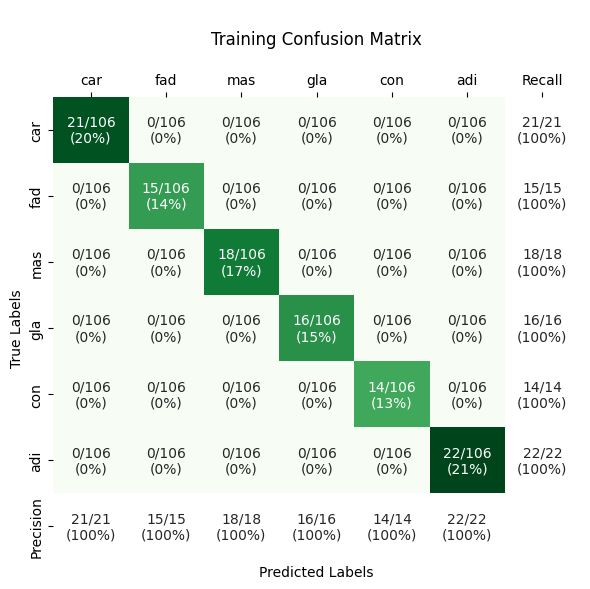

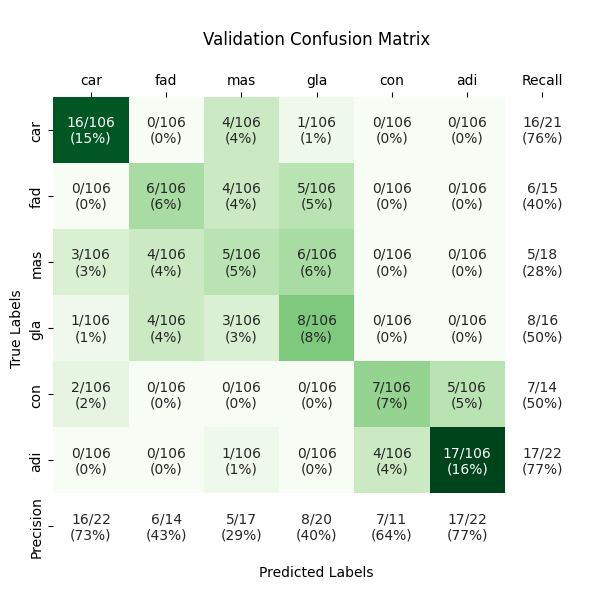

In [4]:
knn.plot_confusion_matrix_heatmap_with_metrics("\nTraining Confusion Matrix\n")  # Training confusion matrix
knn.plot_confusion_matrix_heatmap_with_metrics("\nValidation Confusion Matrix\n")  # Validation confusion matrix


#### Run the code below to plot scores for each item in the training and validation datasets

In [ ]:

display(HTML('<div style="text-align:center;"><strong>Score Report</strong></div>'))
knn.plot_items_scores("Training")
knn.plot_items_scores(val_scores, class_names, y_encoded, "Validation")    
